In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

# import scienceplots
# plt.style.use(['science', 'high-vis'])
# plt.rcParams['figure.dpi'] = 300

def find_repo_root(start: Path = Path.cwd()) -> Path:
    for parent in [start] + list(start.parents):
        if (parent / ".git").exists():
            return parent
    return start  # fallback: cwd

repo_root = find_repo_root()
os.chdir(repo_root)

In [2]:
limits = [
    [0.02212-0.00022*(1/3), 0.02212+0.00022*(1/3)],    
    [0.1206-0.0021*(1/3), 0.1206+0.0021*(1/3)],  
    [1.04077-0.00047*(1/3), 1.04077+0.00047*(1/3)],      
    [3.04-0.016*(1/3), 3.04+0.016*(1/3)],    
    [0.9626-0.0057*(1/3), 0.9626+0.0057*(1/3)],
    # [0.0522-0.008*(3/4), 0.0522+0.008*(3/4)]  
]
param_names = ['omega_b', 'omega_c', 'theta_MC', 'ln10As', 'ns']
param_labels = [r'$\omega_b$', r'$\omega_c$', r'$100\theta_{MC}$', r'$\ln(10^{10}A_s)$', r'$n_s$']

true_parameter1 = [0.02212, 0.1206, 1.04077, 3.04, 0.9626]
true_parameter2 = [0.02205, 0.1224, 1.04035, 3.028, 0.9589]
true_parameter3 = [0.02218, 0.1198, 1.04052, 3.052, 0.9672]

c:\Users\Julian\anaconda3\envs\sbi_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 Training neural network. Epochs trained: 1

Drawing 10 posterior samples: 100%|██████████| 10/10 [00:01<00:00,  5.41it/s]


torch.Size([10, 5])


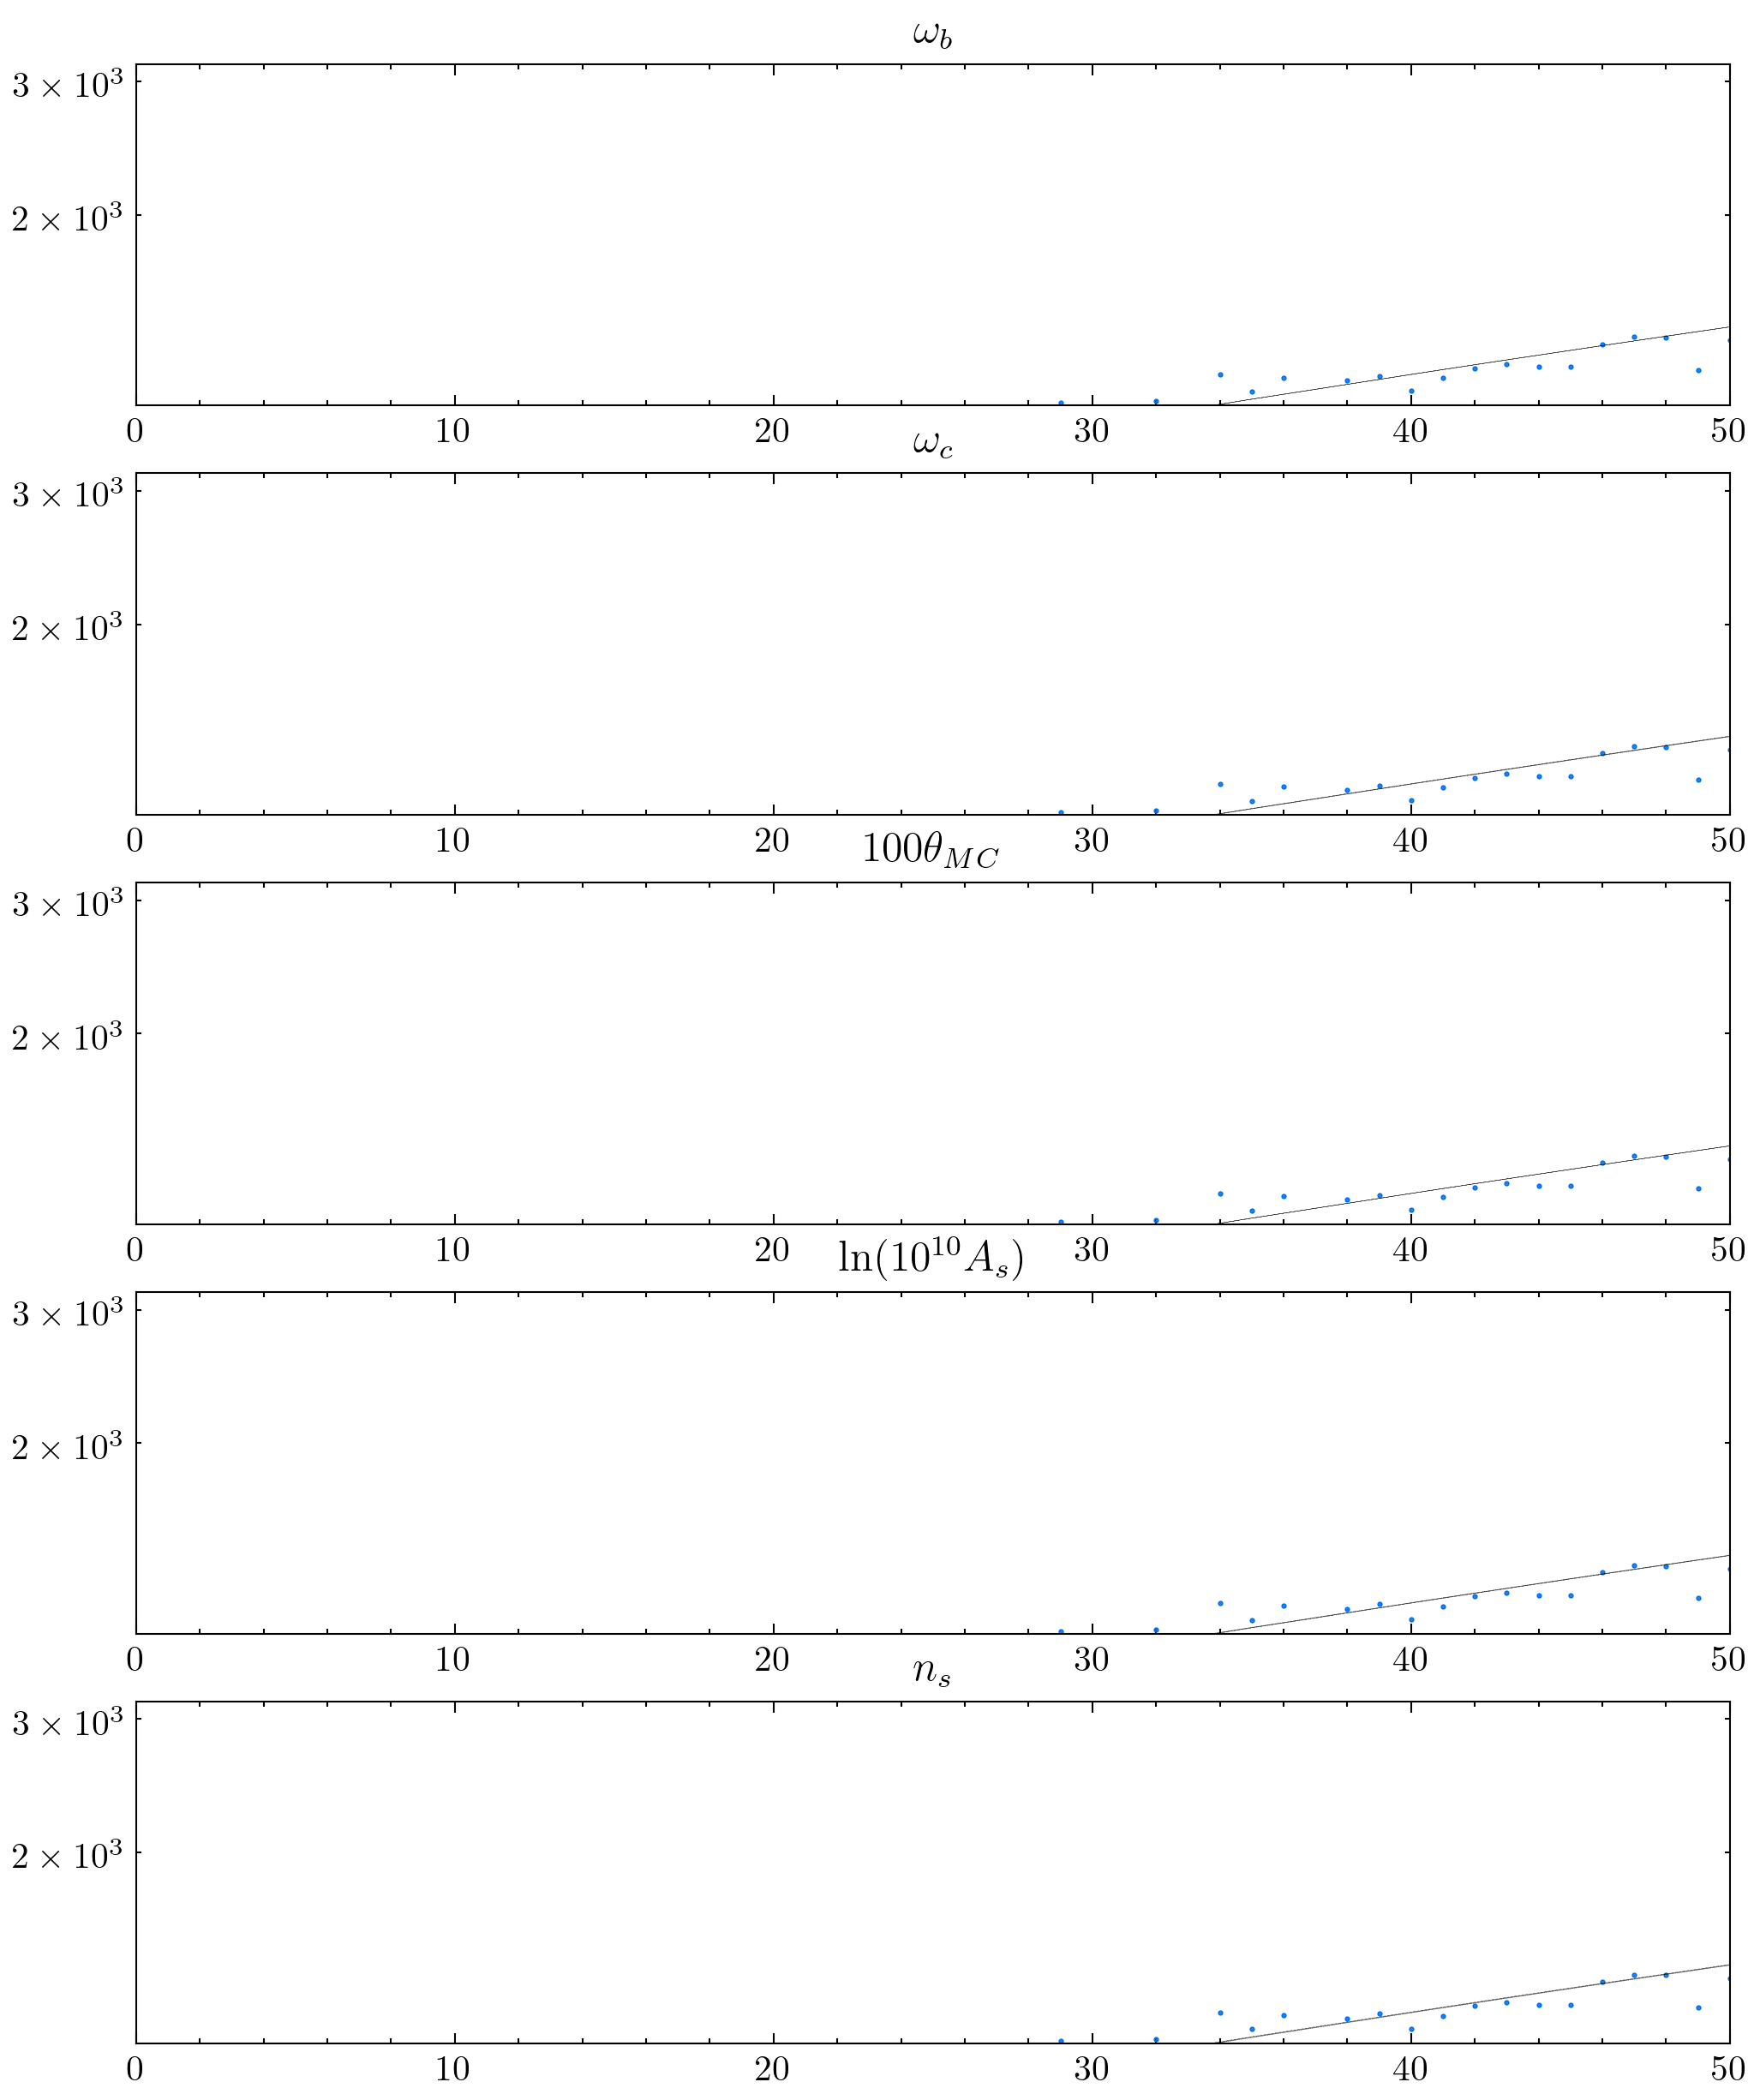

In [3]:
from srcOOP.trainer import Trainer
from srcOOP.plotter import Plotter
from srcOOP.processor import Processor

processor = Processor(type_str="TT")
plotter = Plotter(param_names, param_labels, limits)
simulator = processor.create_simulator(noise=True)
cl_obs = simulator(true_parameter1)

trainer1 = Trainer("NPSE")
theta1, x1 = processor.load_simulations("Cls_TT_noise_reduced_prior_50000_01.pt")
trainer1.load_posterior("NPSE_TT_noise_reduced_prior_50000_01.pth", theta1, x1)
samples1 = trainer1.sample(type_str="TT", true_parameter=true_parameter1, num_samples=10)
print(samples1.shape)

simulator_camb = processor.create_simulator()
fig = plotter.plot_consistency_check(samples1, cl_obs, simulator_camb)
plt.show()